## $F(t) = \int^t_{-\infty} K(t')c(t-t')dt'$
## $R(t) = N[F(t)]$


## $P(x,t)dt = \frac{dt}{\tau}[1-\int^t_{-\infty} K(t')c(x(t-t'))dt']$

## $\frac{d\theta}{dt} = \frac{1}{\tau_{head}}(T_\theta-\theta) + \eta_\theta$

### $\frac{du}{dt} = \frac{1}{\tau_{OU}}(T-u) + \eta_t$

## $Y = X\vec{k} + noise$

## $\vec{k} = (X^TX)^{-1}X^TY$

# $\frac{N_{Butanone}-N_{EtOH}}{N_{total}}$

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import scipy
import random

import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

%matplotlib inline

In [2]:
import plotly
plotly.tools.set_credentials_file(username='kschen', api_key='Tl67YFOurEqUsVCKX7RA')
import plotly.plotly as py
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'plotly'

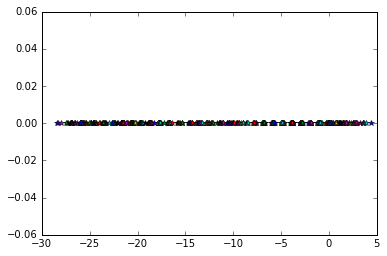

In [85]:
x = [0]
st = 500

for j in range(0,st):
    step_x = random.random()
    if step_x > 0.5:
        x.append(x[j] + 1 + 0.05*np.random.normal())
    else:
        x.append(x[j] - 1 + 0.05*np.random.normal())
    plt.plot(x[j],0,'*')
    plt.hold(True)

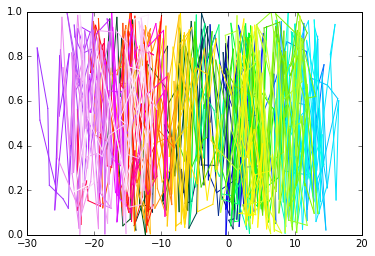

In [114]:
x = [0]
st = 1000
biasX = 0.5

for j in range(st):
    step_x = random.random()
    if step_x > biasX:
        x.append(x[j] + 1 + np.random.normal())
    else:
        x.append(x[j] - 1 + np.random.normal())
        
jit = [random.random() for k in range(len(x))]

##plot tract
#plt.plot(x,jit,'.-')

##time evo
fig, ax = plt.subplots()
for ii in range(0,st-1):
    ax.plot([x[ii],x[ii+1]], [jit[ii], jit[ii+1]],'-')
    
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])

plt.show()

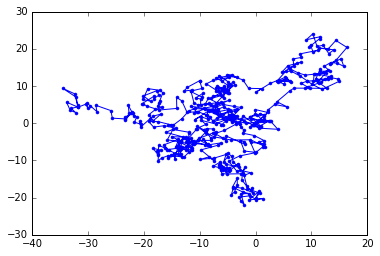

In [98]:
x = [0]
y = [0]
biasX = 0.55
biasY = 0.5

for j in range(st):
    step_x = random.random()
    if step_x > biasX:
        x.append(x[j] + 1 + np.random.normal())
    else:
        x.append(x[j] - 1 + np.random.normal())
    
    step_y = random.random()
    if step_y > biasY:
        y.append(y[j] + 1 + np.random.normal())
    else:
        y.append(y[j] - 1 + np.random.normal())
        
# trace1 = go.Scatter(
#     x=x,
#     y=y,
#     mode='markers',
#     name='Random Walk',
#     marker=dict(
#         color=[i for i in range(len(x))],
#         size=8,
#         colorscale='Greens',
#         showscale=True
#     )
# )

# data = [trace1]
# py.iplot(data, filename='random-walk-2d')

plt.plot(x,y,'.-')

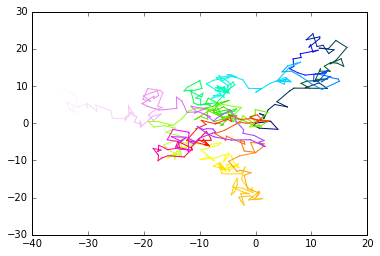

In [99]:
fig, ax = plt.subplots()
#mot = zip(x[0:-2], y[0:-2])
for ii in range(0,st-1):
    ax.plot([x[ii],x[ii+1]], [y[ii], y[ii+1]],'-')
    
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired   
colors = [colormap(i) for i in np.linspace(0, 1,len(ax.lines))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])

plt.show()

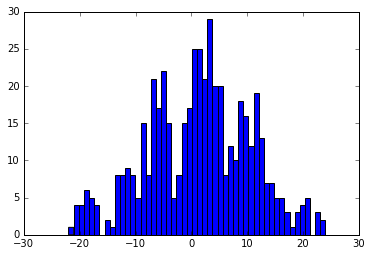

In [101]:
plt.hist(y,50);

In [ ]:
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())

fig, ax = plt.subplots()
for sta, stp in zip(x, y):
    #xx, yy = map(start, stop)
    ax.plot(sta, stp,'.-', color = uniqueish_color())
plt.show()

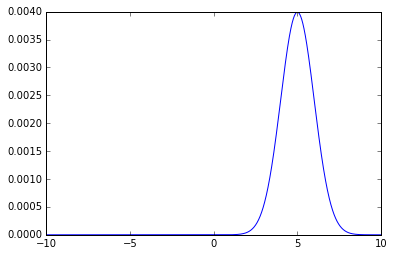

In [2]:
dx = 0.01
xx = np.arange(-10,10,dx)
me = 5
st = 1
ss = np.exp(-0.5*(xx-me)**2/(st**2))/(np.sqrt(2*np.pi)*st) * dx
plt.plot(xx,ss)
#sum(ss)

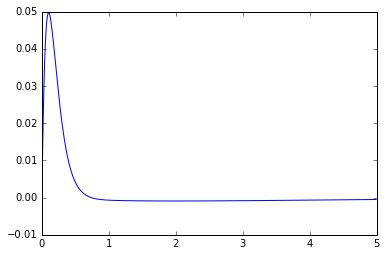

In [78]:
t = np.arange(0,5,0.01)
R = -0.1*t*np.exp(-0.5*t) + 109*t*np.exp(-10*t)# 
R = R/R.sum()
plt.plot(t,R)

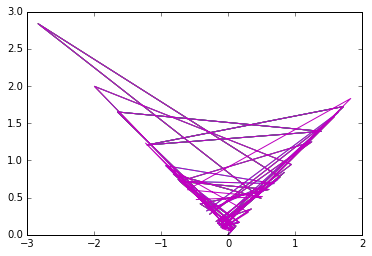

In [228]:
lam = 1
t = 0
x = 0 
V = 1 
STP = 10
for j in range(0,5):
    for i in range(0,STP):
        T = -np.log(1-np.random.rand(1))/lam
        N = len([t])
        t = np.append(t,T)
        x = np.append(x,V*T);
        V = -V;
    plt.plot(x,t,'-')
    plt.hold(True)

# 1-D Biased Random Walk Model

### $P(x,t)dt = \frac{dt}{\tau}[1-\int^t_{-\infty} K(t)c(x(t-t'))dt]$

### $\frac{d\theta}{dt} = \frac{1}{\tau_{head}}(T_\theta-\theta) + \eta_\theta$

### $\frac{du}{dt} = \frac{1}{\tau_{OU}}(T-u) + \eta_t$

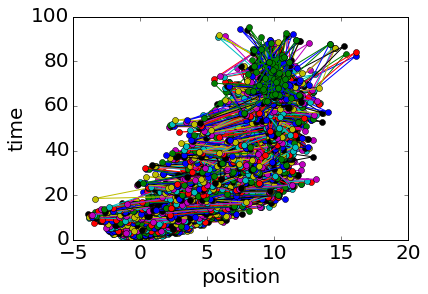

In [17]:
nn = 100
rep = 50
t = np.zeros((rep,nn))
x = np.zeros((rep,nn))
v = np.zeros((rep,nn))

targ = 10
La = 1.
V = 1

for rr in range(0,rep):
    for i in range(1,nn):
        T = -np.log(1-np.random.rand())/La
        t[rr,i] = t[rr,i-1]+T
        x[rr,i] = x[rr,i-1]+V*T
        v[rr,i] = V*T
        V=-V
            
            
        ###sign check
#         if x[rr,i]>0:
#             La = La+x[rr,i]*0.1
#         else:
#             La = 1

        ###Pirouette model (exponential profile)
        #La = 1 + np.exp(-np.abs(x[rr,i]-targ)/2)
        
        ###real Pirouette model (depend on change)
        if np.abs(x[rr,i]-targ) - np.abs(x[rr,i-1]-targ) > 0:  #up hill
            La = 1
        else:
            La = 1 + (np.exp(-np.abs(x[rr,i]-targ)/100))  #increase tumbling
        
        ###Bearing (adjusting effective turns)
        if V < 0:
            V = -1 + np.exp(-np.abs(x[rr,i]-targ)/2)*0.5
        else:
            V = 1 - np.exp(-np.abs(x[rr,i]-targ)/2)*0.5
    
plt.plot(x,t,'-o');
plt.xlabel('position',fontsize=20)
plt.ylabel('time',fontsize=20)

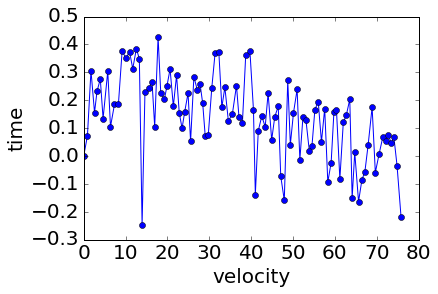

In [81]:
plt.plot(np.mean(t,axis=0),np.mean(v,axis=0),'-o');
plt.xlabel('velocity',fontsize=20)
plt.ylabel('time',fontsize=20)

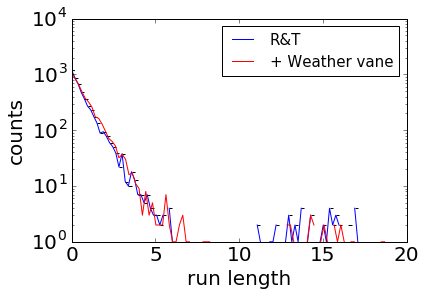

In [82]:
xx = x.reshape((-1,1))
xxx = np.abs(np.diff(xx.T))
n, bins, patches = plt.hist(xxx.T,100);
plt.semilogy(bins[:-1],n,'b',label='R&T')
plt.hold(True)
plt.semilogy(w_bins[:-1],w_n,'r',label='+ Weather vane')
plt.legend(fontsize=15)
plt.xlabel('run length',fontsize=20)
plt.ylabel('counts',fontsize=20)

In [76]:
w_bins = bins
w_n = n

In [14]:
xx = bin_edges[1:]
yy = hist

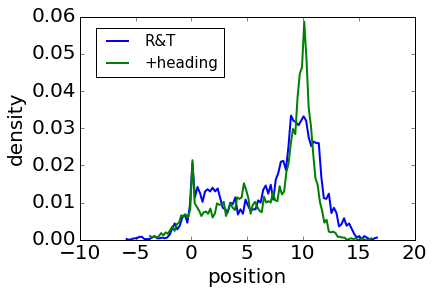

In [36]:
###distribution
hist, bin_edges = np.histogram(x.T,bins=100);
plt.plot(xx,yy/yy.sum(),linewidth=2,label='R&T')
plt.hold(True)
plt.plot(bin_edges[1:],hist/hist.sum(),linewidth=2,label='+heading')
bin_edges.shape
plt.xlabel('position',fontsize=20)
plt.ylabel('density',fontsize=20)
plt.legend(bbox_to_anchor=(0.05, .95), loc=2, borderaxespad=0.,fontsize=15,)

(array([ 3.,  3.,  3.,  3.,  0.,  1.,  2.,  3.,  0.,  1.]),
 array([ 23.43964943,  26.2161032 ,  28.99255697,  31.76901074,
         34.54546451,  37.32191829,  40.09837206,  42.87482583,
         45.6512796 ,  48.42773337,  51.20418714]),
 <a list of 10 Patch objects>)

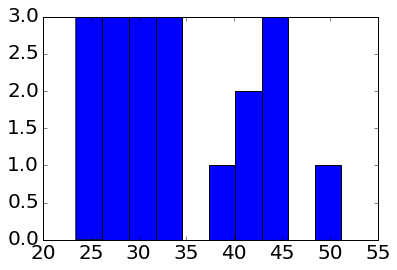

In [13]:
###first-passage time
ts = np.zeros(rep)
for ii in range(0,rep):
    
    temp = np.where(np.abs(x[ii,:]-targ)<0.01)
    if len(temp[0])==0:
        ts[ii] = float('nan')
    else:
        ts[ii] = t[ii,temp[0][0]]

plt.hist(ts[~np.isnan(ts)])

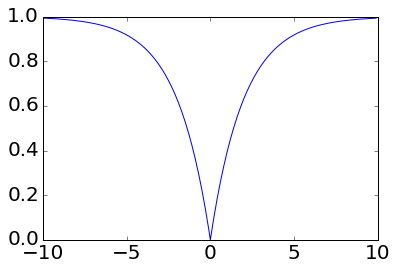

In [8]:
kk = np.arange(-10,10,0.1)
kkk = 1-np.exp(-np.abs(kk-0)/2)
plt.plot(kk,kkk)

# With Filter

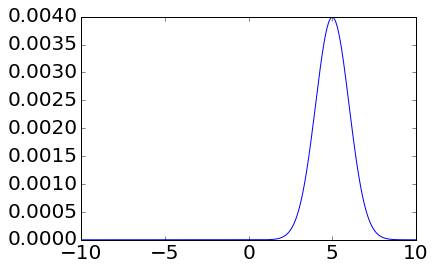

In [83]:
dx = 0.01
xx = np.arange(-10,10,dx)
me = 5
st = 1
ss = np.exp(-0.5*(xx-me)**2/(st**2))/(np.sqrt(2*np.pi)*st) * dx
plt.plot(xx,ss)
#sum(ss)

In [ ]:
nn = 100
rep = 50
t = np.zeros((rep,nn))
x = np.zeros((rep,nn))
v = np.zeros((rep,nn))

targ = 15
La = 1.
V = 1

for rr in range(0,rep):
    for i in range(1,nn):
        T = -np.log(1-np.random.rand())/La
        t[rr,i] = t[rr,i-1]+T
        x[rr,i] = x[rr,i-1]+V*T
        v[rr,i] = V*T
        V=-V
            
            
        ###sign check
#         if x[rr,i]>0:
#             La = La+x[rr,i]*0.1
#         else:
#             La = 1

        ###Pirouette model (exponential profile)
        #La = 1 + np.exp(-np.abs(x[rr,i]-targ)/2)
        
        ###real Pirouette model (depend on change)
        if np.abs(x[rr,i]-targ) - np.abs(x[rr,i-1]-targ) > 0:  #up hill
            La = 1
        else:
            La = 1 + (np.exp(-np.abs(x[rr,i]-targ)/100))  #increase tumbling
        
        ###Bearing (adjusting effective turns)
        if V < 0:
            V = -1 + np.exp(-np.abs(x[rr,i]-targ)/2)*0
        else:
            V = 1 - np.exp(-np.abs(x[rr,i]-targ)/2)*0
    
plt.plot(x,t,'-o');
plt.xlabel('position',fontsize=20)
plt.ylabel('time',fontsize=20)

In [ ]:
dxx = 0.01
xx = np.arange(-10,10,dxx)
me = 5
st = 1
ss = np.exp(-0.5*(xx-me)**2/(st**2))/(np.sqrt(2*np.pi)*st) * dxx
ss = ss + np.random.rand(1)

def Rfunction(c,sc):
    t = np.arange(0,30,0.1)
    R = 1.7*t*np.exp(-0.4*t) - 14.1*t*np.exp(-14.1*t)
    R = R/R.sum()*sc
    intR = np.convolve(c,R)
    norc = np.max(intR)
    return intR[-1]/norc

def tumb(phi):
    lin = min(0,phi)
    if np.random.rand()<lin:
        tum = 1
        #flip = -1
    else:
        tum = 0
        #flip = 1
    return tum#flip

def runn(r,mr):
    if r==1:#np.random.rand()<r:
        rr = np.random.randn()
        dr = max(rr+mr,0)
    else:
        dr = 0
    return dr

sc = 1
dt = 0.1   
T = 100
x = np.zeros(int(T/dt))
x[0] = 1000
x_mem = 5
x_mem = x_mem/dt
mv = 3
c_exp = np.zeros((1,))
c_exp[0] = ss[int(x[0])]

for t in range(1,len(x)):
    for ee in range(0,t):
        c_exp = np.append(c_exp,ss[int(x[ee])])#np.concatenate((c_exp,ss[int(x[ee])]),axis=0)
    phi = Rfunction(c_exp,sc*10**6)
    tum = tumb(phi)
    dx = runn(tum,mv)
    flip = np.random.choice([-1,1]) #np.random.randint()
    x[t] = x[t-1] + flip*dx

# Worm Connectome!

In [2]:
# import csv
# with open("herm_full_edgelist.csv") as f:
#     reader = csv.reader(f)
#     next(reader) # skip header
#     data = [r for r in reader]

In [3]:
import csv
with open("herm_full_edgelist.csv") as f:
    reader = csv.DictReader(f)
    data = [r for r in reader]

In [4]:
allns = []
for i in range(0,len(data)):
    temp = data[i]['Source']
    allns.append(temp.strip())
    #temp = data[i]['Target']
    #allns.append(temp)
data[0]

OrderedDict([('Source', 'I1L '),
             ('Target', ' I2L           '),
             ('Weight', '10'),
             ('Type', 'chemical')])

In [11]:
allns_a = np.array(allns)
nID = np.unique(allns_a)  #all unique neural IDs
ns = len(nID)
AA = np.zeros((ns,ns))

for i in range(0,len(data)):
    typp = data[i]['Type']
    if typp=='chemical': #'electrical':#
        so = data[i]['Source'].strip()
        ta = data[i]['Target'].strip()
        we = data[i]['Weight'].strip()
        #if so=='AWCR':                  #for picking!
        #    print(np.where(so==nID)[0])
        xx = np.where(so==nID)[0]
        yy = np.where(ta==nID)[0]
        if len(yy)==0:
            break
        AA[xx[0],yy[0]] = float(we)

In [76]:
###randomly assign E-I neurons
ratioI = 0.2
ins = int(ratioI*ns)
selected = np.random.choice(ns, ins)
AA[selected] = -1*AA[selected]

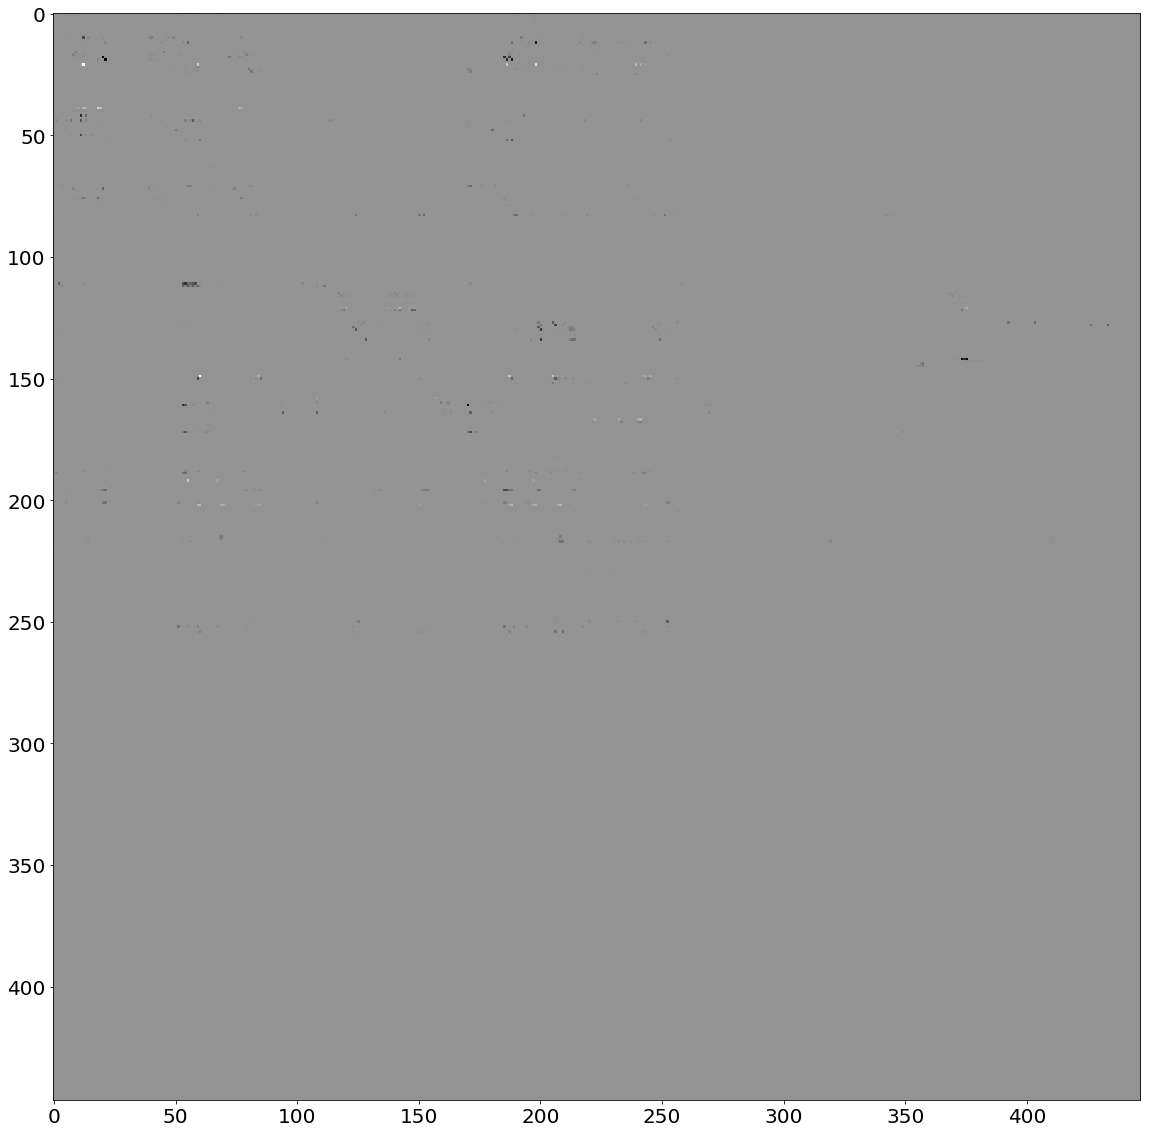

In [77]:
plt.figure(figsize=(20,20))
#AA[AA>0] = 1
plt.imshow(AA[:,:],cmap="hot",interpolation='none')
plt.imshow(AA[:,:],cmap="gray",interpolation='none')

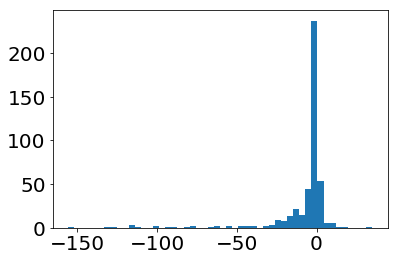

In [78]:
BB = AA.copy()
hist = plt.hist(np.sum(BB,axis=0),bins=50)

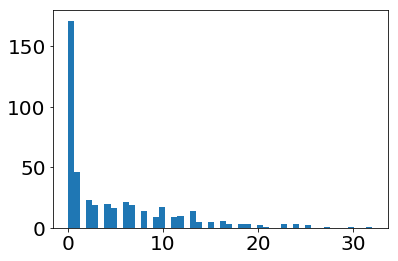

In [79]:
BB = AA.copy()
BB[np.nonzero(BB)] = 1
hist = plt.hist(np.sum(BB,axis=0),bins=50)

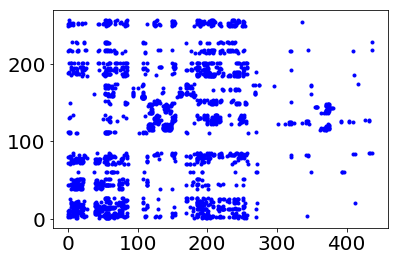

In [80]:
Ak = AA*0
for ii in range(BB.shape[0]-1,0,-1):
    temp = np.where(BB[ii,:] != 0)
    Ak[ii,np.squeeze(temp)] = 1
    if len(temp[0])==1:
        plt.plot(np.squeeze(temp),ii,'bo')
        #plt.hold(True)
    else:
        plt.plot(np.squeeze(temp),np.zeros((np.squeeze(temp)).shape[0])+ii,'b.')
        #plt.hold(True)

Text(0, 0.5, 'count')

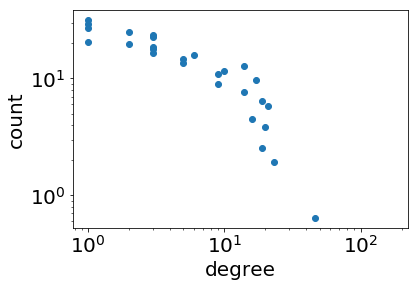

In [81]:
plt.loglog(hist[0],hist[1][:-1],'o')
plt.xlabel('degree',fontsize=20)
plt.ylabel('count',fontsize=20)

Text(0, 0.5, 'eigenvalue')

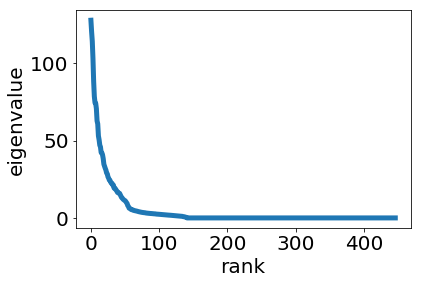

In [82]:
u,s,v = np.linalg.svd(AA @ AA.T)
plt.plot(s**0.5,linewidth=5)
plt.xlabel('rank',fontsize=20)
plt.ylabel('eigenvalue',fontsize=20)

Text(0, 0.5, 'weight in eigenvector')

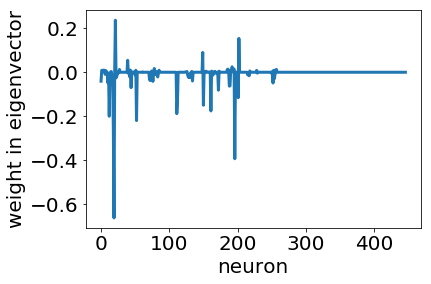

In [83]:
plt.plot(u[:,0],linewidth=3)
plt.xlabel('neuron',fontsize=20)
plt.ylabel('weight in eigenvector',fontsize=20)

Text(0, 0.5, 'Im(eig)')

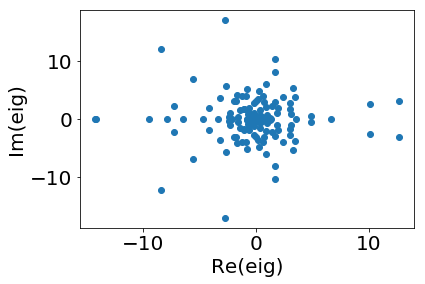

In [84]:
u,v = np.linalg.eig(AA)
Re = np.real(u)
Im = np.real(-u*1j)
plt.plot(Re,Im,'o')
plt.xlabel('Re(eig)',fontsize=20)
plt.ylabel('Im(eig)',fontsize=20)

In [85]:
nn = AA.shape[0]
T = 100
dt = 0.01
time = np.arange(0,T,dt)

def NLf(vs,slp,rect):
    vs_NL = np.exp(vs)
    vs_NL[vs_NL>rect] = rect
    return vs_NL

slp = 1.
rect = 10
tau = 20
vs = np.zeros((nn,len(time)))
vs[:,0] = np.random.randn(nn)
for t in range(0,len(time)-1):
    #vs[:,t+1] = vs[:,t] + dt*(-vs[:,t]/tau + NLf(vs[:,t] @ AA,slp,rect) + np.random.randn(ns)*0.5)
    vs[:,t+1] = vs[:,t] + dt*(-vs[:,t] + (vs[:,t] @ AA)/tau + np.random.randn(ns)*0.5)

Text(0, 0.5, 'activity')

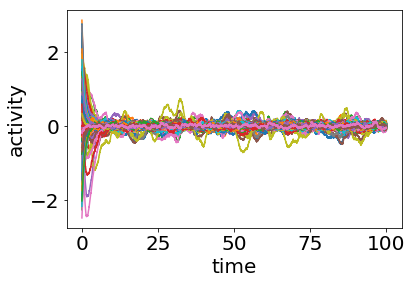

In [86]:
plt.plot(time,vs.T);
plt.xlabel('time',fontsize=20)
plt.ylabel('activity',fontsize=20)

Text(0, 0.5, 'neurons')

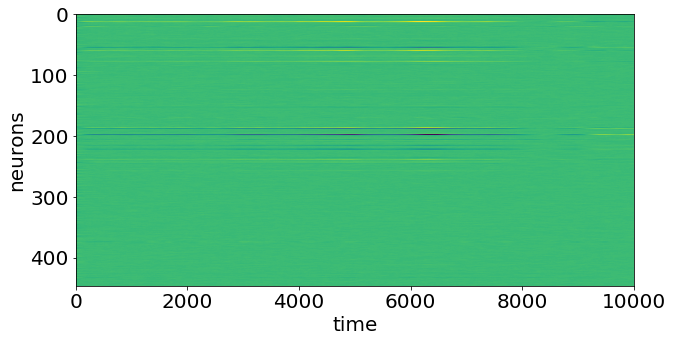

In [69]:
plt.figure(figsize=(10,5))
plt.imshow(vs,interpolation='nearest', aspect='auto')
plt.xlabel('time',fontsize=20)
plt.ylabel('neurons',fontsize=20)

In [70]:
Xs = np.cov(vs)
uu,vv = np.linalg.eig(Xs)

Text(0, 0.5, 'eigenvalue')

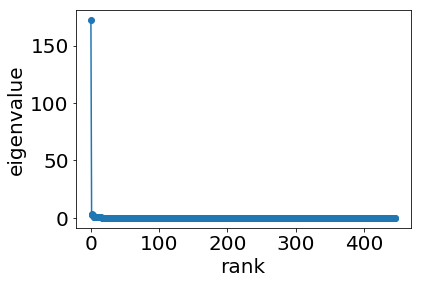

In [71]:
plt.plot(uu,'-o')
plt.xlabel('rank',fontsize=20)
plt.ylabel('eigenvalue',fontsize=20)

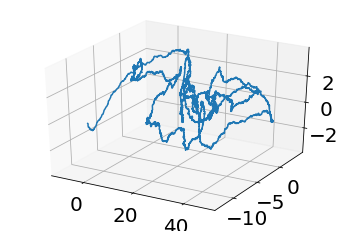

In [72]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')

xx = vs.T @ vv[:,0]
yy = vs.T @ vv[:,1]
zz = vs.T @ vv[:,2]

ax.plot3D(xx,yy,zz)

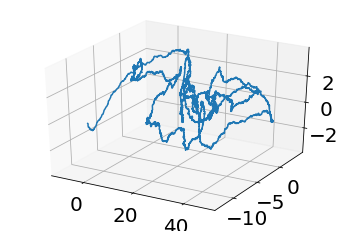

In [73]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot3D(xx,yy,zz)

## $L = \frac{1}{N(N-1)}\sum d_{ij}$

## $C = \frac{1}{N}\sum C_i$

## $C_i = \frac{2E(N_i)}{k_i(k_i-1)}$

## $S = \frac{C}{C^r} \frac{L^r}{L}$

## $d(i) = \frac{1}{N-1}\sum d_{ij}$

## $c_c(i) = \frac{1}{d(i)}$

# Stimulus Decorrelation

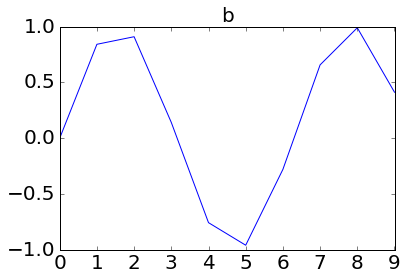

In [3]:
#setting parameters

ll = 10  #kernel length
b = np.sin(np.arange(ll))
a = 1

plt.plot(b)
plt.title('b',fontsize=20)

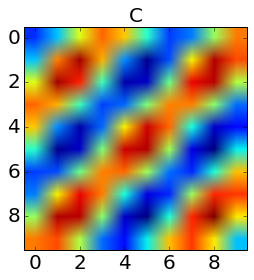

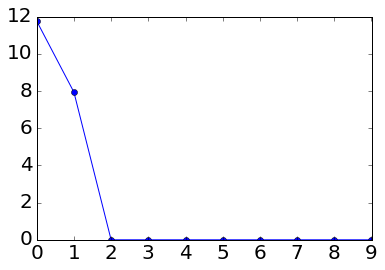

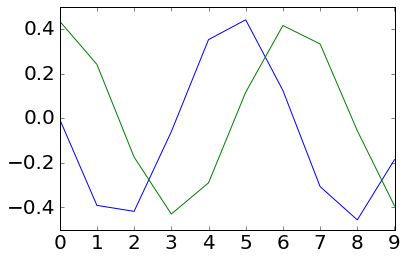

In [4]:
### C matrix
#using two basis with different weights for symmetrical matrix C
cc = np.array([np.sin(np.arange(ll)), np.cos(np.arange(ll))])
ws = np.array([[2.5,0],[0,-1.5]])
C = cc.T @ ws @ cc
plt.imshow(C)
plt.title('C',fontsize=20)

#checking C with svd
plt.figure()
u,s,d = np.linalg.svd(C)
plt.plot(s,'-o')
plt.figure()
plt.plot(u[:,0])
plt.hold(True)
plt.plot(u[:,1])

In [9]:
#stimuli

x = np.random.randn(10000)  #white noise stimuli
#x = np.convolve(x,np.ones(5))
x = x-np.mean(x)

In [15]:
# generate spikes

def NL_func(x,lamb):
    NLx = 1/(1+np.exp(-lamb*x))
    return NLx

lamb = 0.1
scal = 0.05
slop = 0.1
f = np.zeros(len(x)-ll)
for tt in range(0,len(x)-ll):
    xx = np.flip(x[tt:tt+ll].T,axis=0) #x[tt:tt+ll] #
    #f[tt] = np.exp((0.5* xx.T @ C @ xx + b @ xx + a )*10**(-2))  
    ff = np.exp((0.5* xx.T @ C @ xx + b @ xx + a )*scal)  #exp quadratic function for LNP model
    #ff = np.max([0,slop*(0.5* xx.T @ C @ xx + b @ xx + a )])  #rectified linear nonlinearity
    #ff = NL_func((0.5* xx.T @ C @ xx + b @ xx + a ),lamb)
    f[tt] = np.random.poisson(ff)

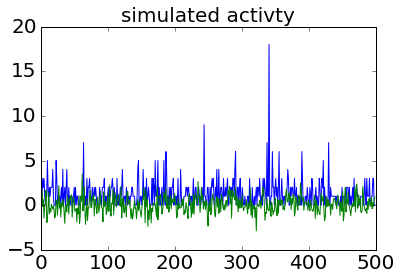

In [16]:
nn = 500
plt.plot(f[0:nn])
plt.hold(True)
plt.plot(x[ll:nn+ll])
plt.title('simulated activty',fontsize=20)

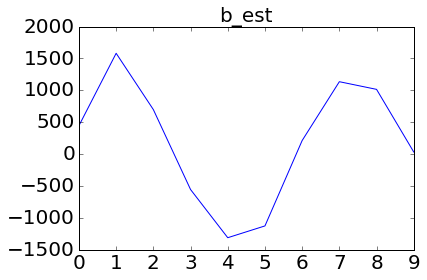

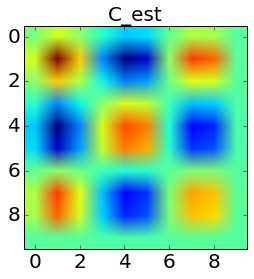

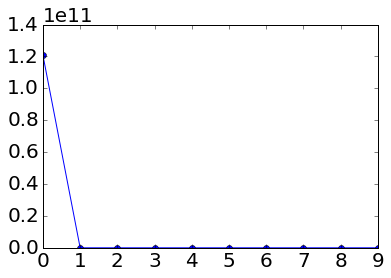

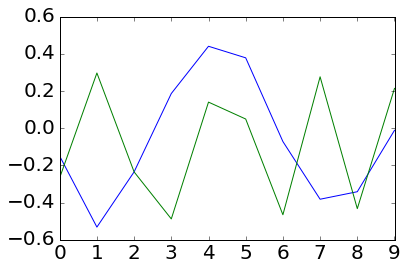

In [17]:
# spike-triggered analysis

#design matrix
X = np.zeros((len(x)-ll,ll))
for ii in range(0,len(x)-ll):
    X[ii,:] = x[ii:ii+ll]

#STA
best = f @ X  #STA = (XXt)-1(XtY) = XtY for white noise input
plt.figure
plt.plot(best)
plt.title('b_est',fontsize=20)

#STC
Cest = np.zeros((ll,ll))
for ii in range(0,len(x)-ll):
    temp = x[ii:ii+ll] - best
    Cest = Cest + f[ii]*(np.expand_dims(temp,axis=0).T @ np.expand_dims(temp,axis=0))
plt.figure()
# xm = X - mu
# stc = f @ xm @ xm.T
plt.imshow(Cest)
plt.title('C_est',fontsize=20)

plt.figure()
u,s,d = np.linalg.svd(Cest)
plt.plot(s,'-o')
plt.figure()
plt.plot(u[:,0])
plt.hold(True)
plt.plot(u[:,1])

In [18]:
covX = np.cov(X.T)

In [19]:
inv_xxt = np.linalg.solve(covX,np.eye(ll))

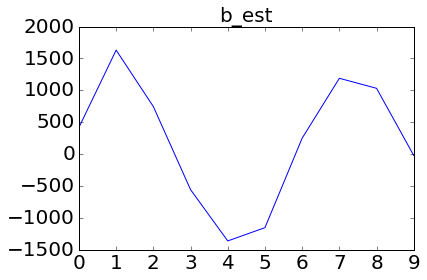

In [20]:
# de-correlation

covX = np.cov(X)
best2 = inv_xxt @ X.T @ f  #STA = (XXt)-1(XtY) = XtY for white noise input
plt.figure
plt.plot(best2)
plt.title('b_est',fontsize=20)

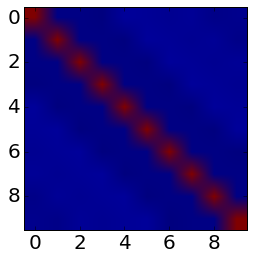

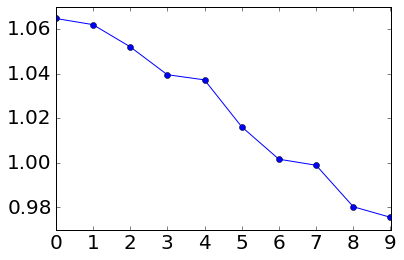

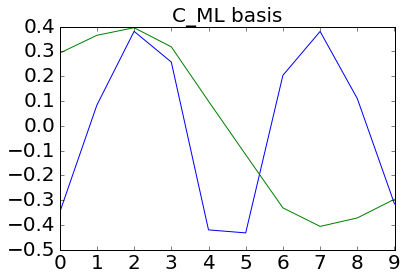

In [22]:
#Cest2 = inv_xxt @ Cest  #decorrelation
Cest2 = inv_xxt - np.linalg.inv(Cest)  #ML equation
plt.imshow(Cest2)

#C_ML spectrum and kernels

plt.figure()
u,s,d = np.linalg.svd(Cest2)
plt.plot(s,'-o')

plt.figure()
plt.plot(u[:,0])
plt.hold(True)
plt.plot(u[:,-1])
plt.title('C_ML basis',fontsize=20)